In [1]:
import keras
import os, shutil, os.path
import pandas as pd
import numpy as np
import re
from sklearn import preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import models
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

Using TensorFlow backend.
/Users/shelly/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/shelly/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/shelly/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/shelly/anaconda3/lib/python3.7/site-packages/t

In [2]:
keras.__version__

'2.2.4'

In [3]:
df1 = pd.read_csv('../all_files_biglabel_nov19.csv')
df2 = pd.read_csv('/Users/shelly/Google Drive/CPE695/pub_priv.csv')
df3 = pd.merge(df1, df2, on='label', how='inner')
df3.dropna(subset=['pub_priv'], inplace=True)

df3.groupby('pub_priv').count()

,filename,label,biglabel
pub_priv,,,
private,4406,4406,4406
public,6209,6209,6209


In [4]:
df3 = df3.drop(df3.index[df3.filename == 'trainstation_30.jpg'])
df3 = df3.drop(df3.index[df3.filename == 'bookstore_56.jpg'])
df3 = df3.drop(df3.index[df3.filename == 'dining_room_49.jpg'])
df3 = df3.drop(df3.index[df3.filename == 'laboratorywet_25.jpg'])
df3 = df3.drop(df3.index[df3.filename == 'mall_39.jpg'])
df3 = df3.drop(df3.index[df3.filename == 'shoeshop_23.jpg'])

In [5]:
len(df3.groupby('label').count().index.tolist())

45

In [6]:
train = df3[:8000]
test = df3[8000:10000]

In [7]:
datagen=ImageDataGenerator(rescale=1./255.,validation_split=0.25)
test_datagen=ImageDataGenerator(rescale=1./255.)

In [8]:
DIR = "../Images_all"
train_generator=datagen.flow_from_dataframe(dataframe=train,
                                            directory=DIR,
                                            x_col="filename",
                                            y_col="pub_priv",
                                            subset="training",
                                            batch_size=32,
                                            seed=42,
                                            shuffle=True,
                                            class_mode="binary",
                                            target_size=(150,150))
valid_generator=datagen.flow_from_dataframe(dataframe=train,
                                            directory=DIR,
                                            x_col="filename",
                                            y_col="pub_priv",
                                            subset="validation",
                                            batch_size=32,
                                            seed=42,
                                            shuffle=True,
                                            class_mode="binary",
                                            target_size=(150,150))
# test_generator=test_datagen.flow_from_dataframe(dataframe=test,
#                                                 directory=DIR,
#                                                 x_col="filename",
#                                                 y_col=None,
#                                                 batch_size=32,
#                                                 seed=42,
#                                                 shuffle=False,
#                                                 class_mode=None,
#                                                 target_size=(150,150))

Found 6000 validated image filenames belonging to 2 classes.
Found 2000 validated image filenames belonging to 2 classes.


# First Model (Controlled the effect of MLP)

In [9]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((4, 4)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 146, 146, 32)      9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 144, 144, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 41472)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               21234176  
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 513       
Total para

In [11]:
import datetime
start = (datetime.datetime.now())
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=valid_generator,
      validation_steps=50)
print(datetime.datetime.now())
print(datetime.datetime.now() - start)

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
100/100 [==============================] - 113s 1s/step - loss: 6.1100 - acc: 0.6106 - val_loss: 6.4666 - val_acc: 0.5944
Epoch 2/30
100/100 [==============================] - 120s 1s/step - loss: 6.3820 - acc: 0.5997 - val_loss: 6.3709 - val_acc: 0.6004
Epoch 3/30
100/100 [==============================] - 144s 1s/step - loss: 6.3421 - acc: 0.6022 - val_loss: 6.7332 - val_acc: 0.5777
Epoch 4/30
100/100 [==============================] - 150s 1s/step - loss: 6.1329 - acc: 0.6153 - val_loss: 6.4212 - val_acc: 0.5972
Epoch 5/30
100/100 [==============================] - 158s 2s/step - loss: 6.2225 - acc: 0.6097 - val_loss: 6.4367 - val_acc: 0.5962
Epoch 6/30
100/100 [==============================] - 167s 2s/step - loss: 6.3022 - acc: 0.6047 - val_loss: 6.5118 - val_acc: 0.5915
Epoch 7/30
100/100 [==============================] - 163s 2s/step - loss: 6.3520 - acc: 0.6016 - val_loss: 6.6527 - val_acc: 0.5827
Epoch 8/30
100/100 [=

In [12]:
model.save('pub_priv_first_1hid.h5')

In [13]:
def plot_train_val_acc(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))
    import matplotlib.pyplot as plt
    plt.plot(epochs, acc, 'b', label='Training acc')
    plt.plot(epochs, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

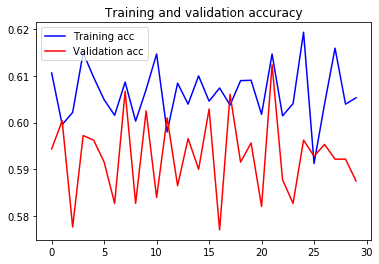

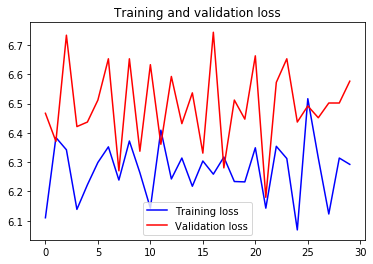

In [14]:
plot_train_val_acc(history)

In [15]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator=test_datagen.flow_from_dataframe(dataframe=test,
                                                directory=DIR,
                                                x_col="filename",
                                                y_col="pub_priv",
                                                shuffle=False,
                                                batch_size=1,
                                                class_mode='binary',
                                                target_size=(150,150))

predict = model.predict_generator(test_generator, steps=len(test))
test_labels = test_generator.classes

Found 2000 validated image filenames belonging to 2 classes.


In [35]:
score = accuracy_score(test_labels, predict.round())
print("The accruacy score is %f" % score)
print(classification_report(test_labels, predict.round()))

The accruacy score is 0.597500
              precision    recall  f1-score   support

           0       0.61      0.51      0.56       989
           1       0.59      0.68      0.63      1011

    accuracy                           0.60      2000
   macro avg       0.60      0.60      0.59      2000
weighted avg       0.60      0.60      0.59      2000



# First Model Adjusted MLP

In [16]:
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model1.add(layers.Conv2D(32, (3, 3), activation='relu'))
model1.add(layers.Conv2D(32, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((4, 4)))
model1.add(layers.Flatten())
model1.add(layers.Dense(256, activation='relu'))
model1.add(layers.Dense(128, activation='relu'))
model1.add(layers.Dropout(0.5))
model1.add(layers.Dense(1, activation='sigmoid'))


model1.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [17]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 146, 146, 32)      9248      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 144, 144, 32)      9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 41472)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               10617088  
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
__________

In [18]:
start = (datetime.datetime.now())
history1 = model1.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=valid_generator,
      validation_steps=50)
print(datetime.datetime.now())
print(datetime.datetime.now() - start)

Epoch 1/30
100/100 [==============================] - 112s 1s/step - loss: 0.6662 - acc: 0.6038 - val_loss: 0.6174 - val_acc: 0.6345
Epoch 2/30
100/100 [==============================] - 105s 1s/step - loss: 0.6021 - acc: 0.6453 - val_loss: 0.6448 - val_acc: 0.6313
Epoch 3/30
100/100 [==============================] - 104s 1s/step - loss: 0.5821 - acc: 0.6819 - val_loss: 0.6031 - val_acc: 0.6641
Epoch 4/30
100/100 [==============================] - 105s 1s/step - loss: 0.5656 - acc: 0.6969 - val_loss: 0.5729 - val_acc: 0.7121
Epoch 5/30
100/100 [==============================] - 104s 1s/step - loss: 0.5194 - acc: 0.7309 - val_loss: 0.7292 - val_acc: 0.6637
Epoch 6/30
100/100 [==============================] - 104s 1s/step - loss: 0.4739 - acc: 0.7672 - val_loss: 0.7352 - val_acc: 0.6862
Epoch 7/30
100/100 [==============================] - 106s 1s/step - loss: 0.4014 - acc: 0.8116 - val_loss: 0.6807 - val_acc: 0.7052
Epoch 8/30
100/100 [==============================] - 105s 1s/step - 

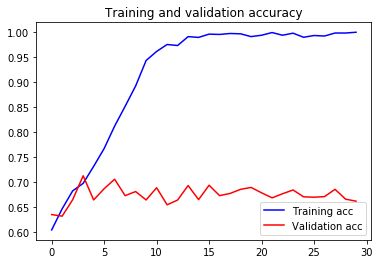

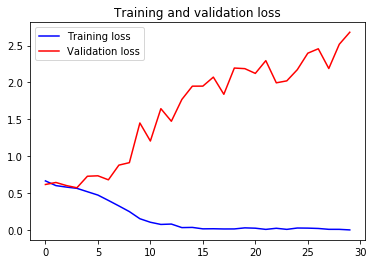

In [28]:
plot_train_val_acc(history1)

In [20]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator=test_datagen.flow_from_dataframe(dataframe=test,
                                                directory=DIR,
                                                x_col="filename",
                                                y_col="pub_priv",
                                                shuffle=False,
                                                batch_size=1,
                                                class_mode='binary',
                                                target_size=(150,150))

Found 2000 validated image filenames belonging to 2 classes.


In [21]:
predict1 = model1.predict_generator(test_generator, steps=len(test))

In [22]:

test_labels = test_generator.classes
score1 = accuracy_score(test_labels, predict1.round())
print("The accruacy score is %f" % score1)
print(classification_report(test_labels, predict1.round()))

The accruacy score is 0.616500
              precision    recall  f1-score   support

           0       0.62      0.59      0.60       989
           1       0.62      0.64      0.63      1011

    accuracy                           0.62      2000
   macro avg       0.62      0.62      0.62      2000
weighted avg       0.62      0.62      0.62      2000



# First Model adjusted: picture augmentation

In [23]:
train_datagen2 = ImageDataGenerator(rescale=1./255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    validation_split=0.25)
test_datagen2 = ImageDataGenerator(rescale=1./255)

In [24]:
DIR = "../Images_all"
train_generator=train_datagen2.flow_from_dataframe(dataframe=train,
                                            directory=DIR,
                                            x_col="filename",
                                            y_col="pub_priv",
                                            subset="training",
                                            batch_size=32,
                                            seed=42,
                                            shuffle=True,
                                            class_mode="binary",
                                            target_size=(150,150))
valid_generator=train_datagen2.flow_from_dataframe(dataframe=train,
                                            directory=DIR,
                                            x_col="filename",
                                            y_col="pub_priv",
                                            subset="validation",
                                            batch_size=32,
                                            seed=42,
                                            shuffle=True,
                                            class_mode="binary",
                                            target_size=(150,150))
test_generator=test_datagen2.flow_from_dataframe(dataframe=test,
                                                directory=DIR,
                                                x_col="filename",
                                                y_col=None,
                                                batch_size=32,
                                                seed=42,
                                                shuffle=False,
                                                class_mode=None,
                                                target_size=(150,150))

Found 6000 validated image filenames belonging to 2 classes.
Found 2000 validated image filenames belonging to 2 classes.
Found 2000 validated image filenames.


In [25]:
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model2.add(layers.Conv2D(32, (3, 3), activation='relu'))
model2.add(layers.Conv2D(32, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((4, 4)))
model2.add(layers.Flatten())
model2.add(layers.Dense(256, activation='relu'))
model2.add(layers.Dense(128, activation='relu'))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [26]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 146, 146, 32)      9248      
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 144, 144, 32)      9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 41472)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               10617088  
_________________________________________________________________
dense_10 (Dense)             (None, 128)               32896     
__________

In [27]:
history2_aug = model2.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=valid_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 148s 1s/step - loss: 0.6486 - acc: 0.6019 - val_loss: 0.6382 - val_acc: 0.5994
Epoch 2/30
100/100 [==============================] - 142s 1s/step - loss: 0.6275 - acc: 0.6262 - val_loss: 0.6218 - val_acc: 0.6338
Epoch 3/30
100/100 [==============================] - 147s 1s/step - loss: 0.6176 - acc: 0.6322 - val_loss: 0.6234 - val_acc: 0.6660
Epoch 4/30
100/100 [==============================] - 146s 1s/step - loss: 0.6150 - acc: 0.6531 - val_loss: 0.6303 - val_acc: 0.6326
Epoch 5/30
100/100 [==============================] - 141s 1s/step - loss: 0.6009 - acc: 0.6628 - val_loss: 0.6278 - val_acc: 0.6388
Epoch 6/30
100/100 [==============================] - 142s 1s/step - loss: 0.5975 - acc: 0.6775 - val_loss: 0.6240 - val_acc: 0.6692
Epoch 7/30
100/100 [==============================] - 149s 1s/step - loss: 0.5974 - acc: 0.6666 - val_loss: 0.6103 - val_acc: 0.6604
Epoch 8/30
100/100 [==============================] - 167s 2s/step - 

In [29]:
model2.save('pub_priv_first_augmented.h5')

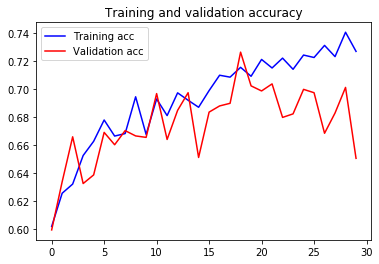

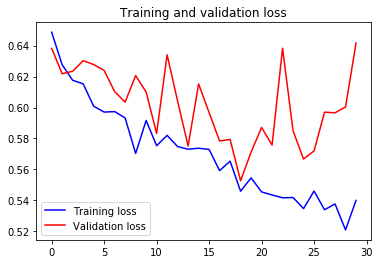

In [30]:
# newest result
plot_train_val_acc(history2_aug)

In [32]:
predict2 = model2.predict_generator(test_generator, steps=len(test))
score2 = accuracy_score(test_labels, predict2.round())
print("The accruacy score is %f" % score2)
print(classification_report(test_labels, predict2.round()))

ValueError: Found input variables with inconsistent numbers of samples: [2000, 63488]